# Customer Product Review: Sentiment Analysis
-----
-----

In [3]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r"C:\Users\Ajinkya\Desktop\245_1_part3.csv")

In [6]:
dataset.head()

Unnamed: 0            brand   
0           0  Universal Music  \
1           1         Lundberg   
2           2         Lundberg   
3           3              K-Y   
4           4              K-Y   

                                          categories   
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  \
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  reviews.rating   
0  Universal Music Group / Cash Money               5  \
1                            Lundberg               5   
2                            Lundberg               5   
3                                 K-Y               1   
4                                 K-Y               1   

                                        reviews.text     label   
0  i love this album. it's very good. more to the...  positive  \
1  Good flavor. This review was collected as part...  positive   
2                                       Good flavor.  positive   
3  I read through the reviews on here before look...  negative   
4  My husband bought this gel for us. The gel cau...  negative   

                                 reviews.text_reduce  
0  i love this album. it's very good. more to the...  
1  Good flavor. This review was collected as part...  
2                                       Good flavor.  
3  I read through the reviews on here before look...  
4  My husband bought this gel for us. The gel cau...

In [7]:
dataset.shape

(70867, 8)

In [8]:
dataset.isnull().sum()

Unnamed: 0             0
brand                  0
categories             0
manufacturer           0
reviews.rating         0
reviews.text           0
label                  0
reviews.text_reduce    0
dtype: int64

## Data Cleaning:
------

### Selecting Required Columns:

In [21]:
# Assuming 'dataset' is your DataFrame
dataset = dataset[['brand', 'manufacturer', 'reviews.rating', 'reviews.text']]


### Checking Null values:

In [ ]:
dataset.isnull().sum()

### Inputing null values on 'reviews.didpurchase' & Removing all the null values:

In [14]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
dataset['reviews.didPurchase'] = 'Not Available'


In [12]:
dataset = dataset.dropna()

## Visualizing The Result:
----

### Review Ratings Distribution:
-----

In [10]:
data = dataset['reviews.rating'].value_counts()

<Axes: xlabel='reviews.rating'>

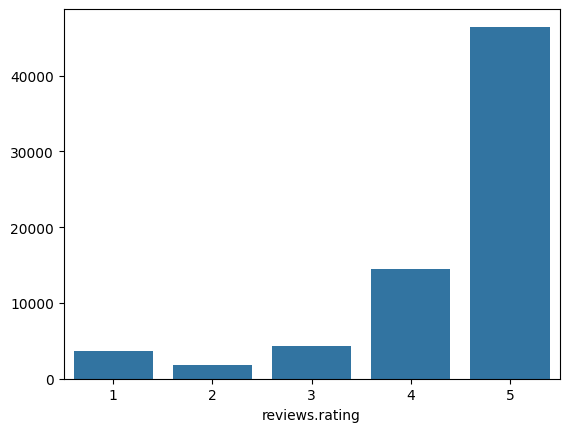

In [11]:
sns.barplot(x=data.index, y=data.values)

**Need to map 1,2 - Unhappy, 3-OK and 4,5 - Happy**

### Fake Reviews Provided by User:
-----

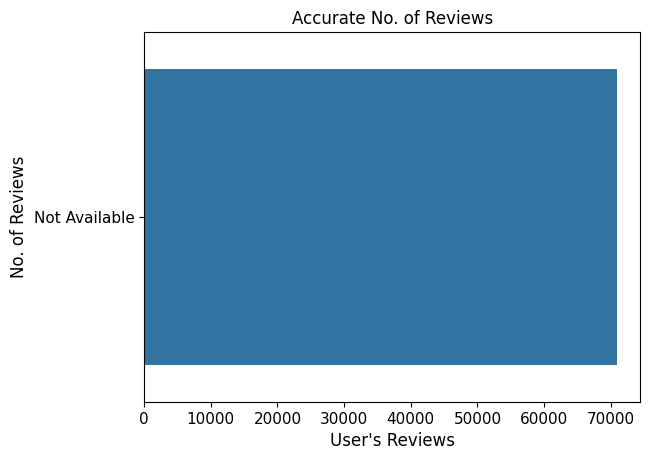

In [15]:
ax_plt = sns.countplot(dataset['reviews.didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

**True reviews are less in number and as you can see poeple who didn't even purchase the product has provided reviews these are all fake reviews which are much higher than those who have purchased and provided the review.**

### Wordcloud
----

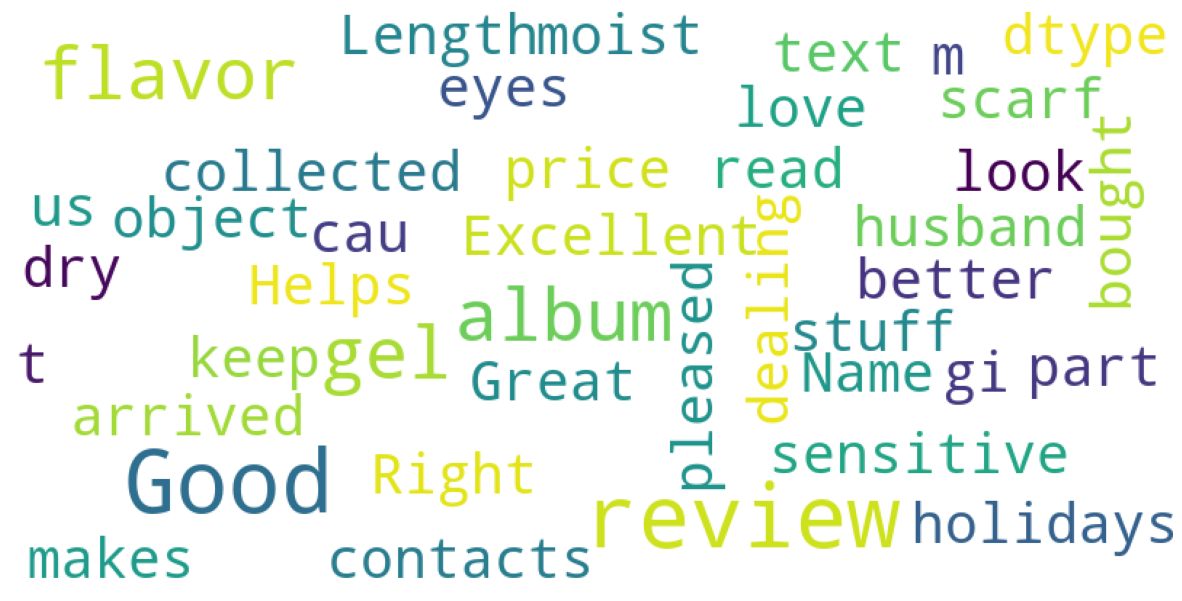

In [16]:
stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(dataset['reviews.text'])

## Feature Transformation:
-----

In [17]:
data=dataset['reviews.text']
train_data=dataset['reviews.text']
y_target=dataset['reviews.rating'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [18]:
vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=10000)
vectorize_word.fit(data)
train_features_word = vectorize_word.transform(train_data)

In [19]:
vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)
vectorize_char.fit(data)
train_features_char = vectorize_char.transform(train_data)
train_features = hstack([train_features_char, train_features_word])

C:\Users\Ajinkya\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y_target,test_size=0.3,random_state=101,shuffle=True)

## SVC Model:
----

In [23]:
lsvm = LinearSVC(class_weight='balanced')
l = lsvm.fit(X_train,y_train)

C:\Users\Ajinkya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Linear SVC Metric Over Training:

In [24]:
pred_train = l.predict(X_train)

In [25]:
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train)))
print(classification_report(y_train,pred_train))

Accuracy Train: 0.9886908841672378
              precision    recall  f1-score   support

       Happy       1.00      0.99      0.99     42745
          Ok       0.89      0.97      0.93      3014
     Unhappy       0.97      1.00      0.99      3847

    accuracy                           0.99     49606
   macro avg       0.95      0.99      0.97     49606
weighted avg       0.99      0.99      0.99     49606



### Linear SVC Metric Over Test:

In [26]:
pred_test=l.predict(X_test)

In [27]:
print("Accuracy Test : {}".format(accuracy_score(y_test,pred_test)))
print(classification_report(y_test,pred_test))

Accuracy Test : 0.9013216687832181
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.39      0.38      0.39      1336
     Unhappy       0.75      0.74      0.75      1682

    accuracy                           0.90     21261
   macro avg       0.70      0.69      0.70     21261
weighted avg       0.90      0.90      0.90     21261



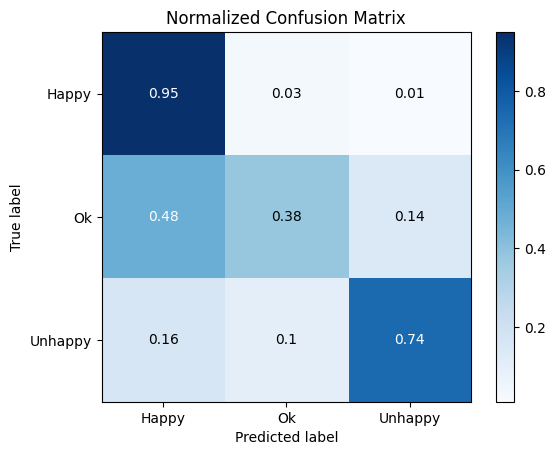

In [28]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)
plt.show()

## SGD Classifier:
----

In [30]:
from sklearn.linear_model import SGDClassifier

# Initialize SGDClassifier with class_weight='balanced' and max_iter=300
svm1 = SGDClassifier(class_weight='balanced', n_jobs=-1, max_iter=300)

# Fit the classifier to the training data
svm1.fit(X_train, y_train)


SGDClassifier(class_weight='balanced', max_iter=300, n_jobs=-1)

### SGD Metric Over Training:

In [31]:
pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.9394428093375802
              precision    recall  f1-score   support

       Happy       0.98      0.96      0.97     42745
          Ok       0.61      0.71      0.65      3014
     Unhappy       0.83      0.88      0.85      3847

    accuracy                           0.94     49606
   macro avg       0.80      0.85      0.83     49606
weighted avg       0.94      0.94      0.94     49606



### SGD Metric Over Test:

In [32]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.8995813931611871
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.40      0.40      0.40      1336
     Unhappy       0.72      0.75      0.73      1682

    accuracy                           0.90     21261
   macro avg       0.69      0.70      0.70     21261
weighted avg       0.90      0.90      0.90     21261



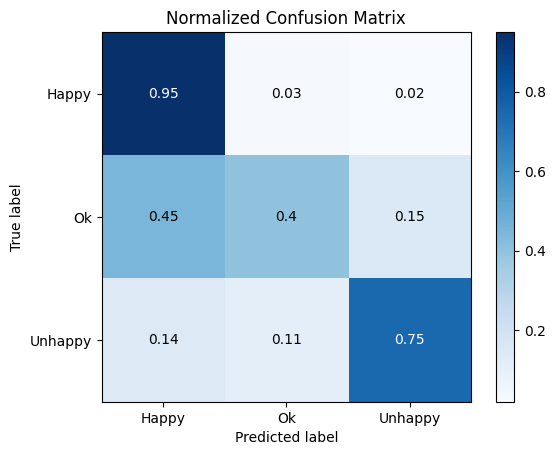

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test_sgd, normalize=True)
plt.show()